<a href="https://colab.research.google.com/github/maidacundo/FAIKR-3/blob/main/bayesian_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
! pip install pgmpy
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import warnings
# Suppress pgmpy internal deprecated use of third party libraries.
warnings.simplefilter(action='ignore', category=FutureWarning)
# Suppress UserWarning related to machine precision calculations of percentage.
warnings.simplefilter(action='ignore', category=UserWarning)

# Import pgmpy modules.
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination, ApproxInference
from pgmpy.sampling import GibbsSampling

# Import graphics related libraries and modules.
import matplotlib.pyplot as plt
from IPython.display import display

# Import other useful librares and modules.
import numpy as np
import pandas as pd
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [72]:
meat_consumption = pd.read_csv('https://raw.githubusercontent.com/maidacundo/FAIKR-3/main/meat-consumption-vs-gdp-per-capita.csv')

meat_production = pd.read_csv('https://raw.githubusercontent.com/maidacundo/FAIKR-3/main/global-meat-production.csv')

renewable_energy_production = pd.read_csv('https://raw.githubusercontent.com/maidacundo/FAIKR-3/main/renewablePowerGeneration97-17.csv')

energy_consumption = pd.read_csv('https://raw.githubusercontent.com/maidacundo/FAIKR-3/main/Continent_Consumption_TWH.csv')

co2_production = pd.read_csv('https://raw.githubusercontent.com/maidacundo/FAIKR-3/main/owid-co2-data.csv')

In [ ]:
meat_consumption['Year'] = meat_consumption['Year'].apply(lambda x: x if str(x).isnumeric() else False)
meat_consumption['Year'] = meat_consumption['Year'].astype(int)
meat_consumption = meat_consumption.loc[meat_consumption['Year'] >= 1960]

In [ ]:
meat_consumption.loc[meat_consumption['Entity'] == 'World']

In [ ]:
meat_production.loc[meat_production['Entity'] == 'World']

In [ ]:
column_names = list(renewable_energy_production.columns)
renewable_energy_production['Total Renewable Energy(TWh)'] = renewable_energy_production[column_names[1:]].sum(axis=1)
renewable_energy_production.groupby(['Year']).sum().reset_index()
renewable_energy_production

In [74]:
co2_production

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.00,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.70,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.00,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.00,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25199,ZWE,Zimbabwe,2016,10.738,12.153,-12.17,-1.488,1.415,0.765,0.866,...,4.703,11.92,0.85,6.55,0.467,14030338.0,2.096179e+10,47.5,3385.574,1.889
25200,ZWE,Zimbabwe,2017,9.582,11.248,-10.77,-1.156,1.666,0.673,0.790,...,NaN,NaN,NaN,NaN,NaN,14236599.0,2.194784e+10,NaN,NaN,NaN
25201,ZWE,Zimbabwe,2018,11.854,13.163,23.72,2.273,1.308,0.821,0.912,...,NaN,NaN,NaN,NaN,NaN,14438812.0,2.271535e+10,NaN,NaN,NaN
25202,ZWE,Zimbabwe,2019,10.949,12.422,-7.64,-0.905,1.473,0.748,0.848,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN,NaN,NaN


In [37]:
meat_consumption_agg = meat_consumption.groupby(['TIME', 'SUBJECT']).sum().reset_index()

meat_consumption_agg.loc[meat_consumption_agg['TIME'] == 2020]

,TIME,SUBJECT,Value
120,2020,BEEF,187394.968759
121,2020,PIG,343728.863585
122,2020,POULTRY,320111.011319
123,2020,SHEEP,39459.751726


In [23]:
data['WebsiteTraffic'].unique()

array([ 0,  1, -1])

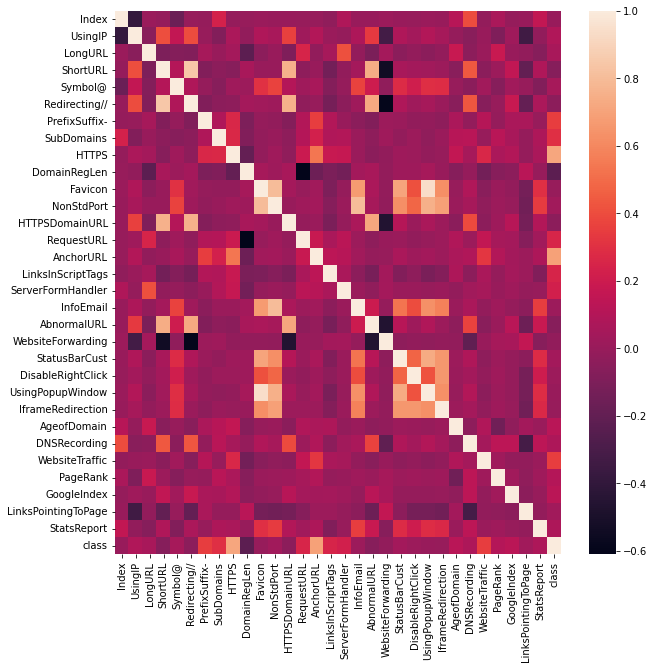

In [17]:
corr = data.corr() 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)